<a href="https://colab.research.google.com/github/anjalisuthar/ANN-for-binary-classification/blob/main/data_science_internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [27]:

rat1 = pd.read_csv("/content/ratings.csv")

shape = rat1.shape
print("Shape = {}".format(shape))


Shape = (100836, 4)


In [28]:
rat1

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [34]:
movie_ratings_count = rat1.groupby('movieId').size().reset_index(name='ratings_count')

max_ratings_movie = movie_ratings_count.loc[movie_ratings_count['ratings_count'].idxmax()]

movies = pd.read_csv('movies.csv')
max_ratings_movie_title = movies.loc[movies['movieId'] == max_ratings_movie['movieId']]['title'].values[0]

print(f" maximum movie number: {max_ratings_movie_title} with {max_ratings_movie['ratings_count']} ratings.")


 maximum movie number: Forrest Gump (1994) with 329 ratings.


In [33]:
tags = pd.read_csv('tags.csv')
matrix_movie_id = movies.loc[movies['title'] == 'Matrix, The (1999)']['movieId'].values[0]

matrix_tags = tags.loc[tags['movieId'] == matrix_movie_id]['tag']
print("Tags for Matrix:")
print(matrix_tags)


Tags for Matrix:
815           martial arts
816                 sci-fi
1646    alternate universe
2794            philosophy
2795      post apocalyptic
Name: tag, dtype: object


In [35]:
matrix_movie_id = movies.loc[movies['title'] == 'Matrix, The (1999)']['movieId'].values[0]
matrix_tags = tags.loc[tags['movieId'] == matrix_movie_id]['tag'].tolist()

print(f"tag: {matrix_tags}")


tag: ['martial arts', 'sci-fi', 'alternate universe', 'philosophy', 'post apocalyptic']


In [37]:
terminator_movie_id = movies.loc[movies['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]
terminator_ratings = rat1.loc[ratings['movieId'] == terminator_movie_id]
average_rating = terminator_ratings['rating'].mean()

print(f" average user rating'is: {average_rating:.2f}")


 average user rating'is: 3.97


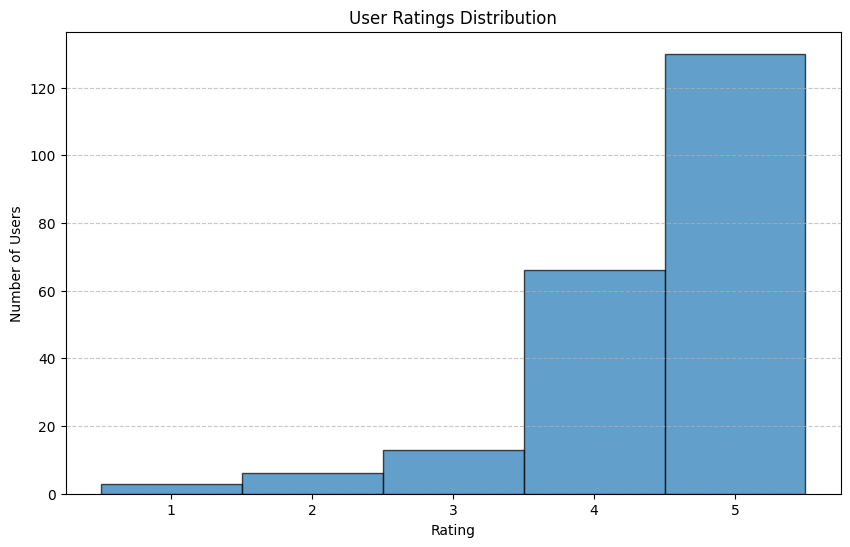

In [39]:
import matplotlib.pyplot as plt

fight_club_movie_id = movies.loc[movies['title'] == 'Fight Club (1999)']['movieId'].values[0]
fight_club_ratings = rat1.loc[rat1['movieId'] == fight_club_movie_id]


plt.figure(figsize=(10, 6))
plt.hist(fight_club_ratings['rating'], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], edgecolor='black', alpha=0.7)
plt.title('User Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.xticks([1, 2, 3, 4, 5])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [40]:
grouped_ratings = rat1.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
grouped_ratings.columns = ['movieId', 'rating_count', 'average_rating']
merged_data = pd.merge(movies, grouped_ratings, on='movieId', how='inner')
filtered_data = merged_data[merged_data['rating_count'] > 50]
most_popular_movie = filtered_data.loc[filtered_data['average_rating'].idxmax()]

print(f" most popular movie:")
print(f"Title: {most_popular_movie['title']}")
print(f"Average Rating: {most_popular_movie['average_rating']:.2f}")


 most popular movie:
Title: Shawshank Redemption, The (1994)
Average Rating: 4.43


In [42]:
grouped_ratings = rat1.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
grouped_ratings.columns = ['movieId', 'rating_count', 'rating_mean']
merged_data = pd.merge(movies, grouped_ratings, on='movieId', how='inner')
popular_movies = merged_data[merged_data['rating_count'] > 50]
sci_fi_movies = popular_movies[popular_movies['genres'].str.contains('Sci-Fi')]
sorted_sci_fi_movies = sci_fi_movies.sort_values(by='rating_count', ascending=False)
third_most_popular_sci_fi = sorted_sci_fi_movies.iloc[0]
print(f" Sci-Fi movie: {third_most_popular_sci_fi['title']} with {third_most_popular_sci_fi['rating_count']} ratings.")


 Sci-Fi movie: Matrix, The (1999) with 278 ratings.
